### loading data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pickle

In [3]:
train=pd.read_csv(r'C:\Users\sk\Downloads\ML\Iris.csv')
train.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
train.shape

(150, 6)

In [5]:
train.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
len(train.columns)

6

In [7]:
train.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
train['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

c:\users\sk\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


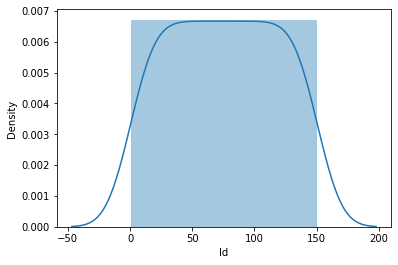

c:\users\sk\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


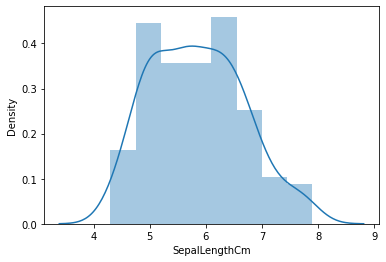

c:\users\sk\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


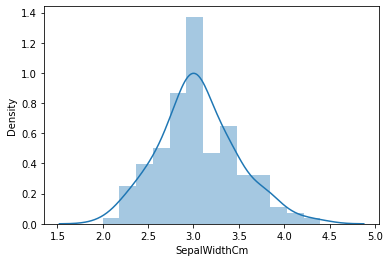

c:\users\sk\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


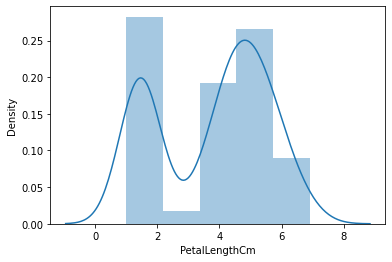

c:\users\sk\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


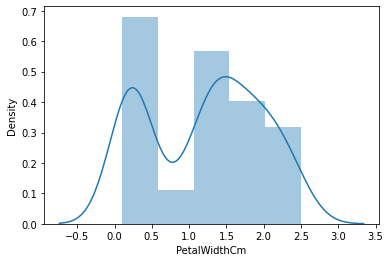

In [9]:
for feature in train.columns:
    if (train[feature].dtype!='O' and len(train[feature].unique())>10):
        sns.distplot(train[feature])
        plt.show()

In [11]:
quant_features=[feature for feature in train.columns if (train[feature].dtype!='O' and len(train[feature].unique())>10)]
quant_features

['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

<AxesSubplot:>

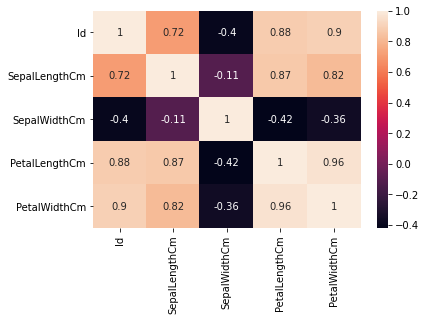

In [12]:
sns.heatmap(train[quant_features].corr(),annot=True)  

In [13]:
x=pd.pivot_table(train,index='Species',values=quant_features)
x

,Id,PetalLengthCm,PetalWidthCm,SepalLengthCm,SepalWidthCm
Species,,,,,
Iris-setosa,25.5,1.464,0.244,5.006,3.418
Iris-versicolor,75.5,4.260,1.326,5.936,2.770
Iris-virginica,125.5,5.552,2.026,6.588,2.974


In [14]:
quant_features

['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [15]:
train['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [16]:
train['Species']=train['Species'].replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],[0,1,2])
train['Species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [17]:
train['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [18]:
train.shape

(150, 6)

### relationship

In [19]:
c_matrix=train.corr()

In [20]:
c_matrix['Species'].sort_values(ascending=False)

Species          1.000000
PetalWidthCm     0.956464
PetalLengthCm    0.949043
Id               0.942830
SepalLengthCm    0.782561
SepalWidthCm    -0.419446
Name: Species, dtype: float64

### feature selection

In [21]:
X=train.iloc[:,1:5]
y=train['Species']

In [22]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [23]:
X.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [24]:
len(X.columns)

4

### cross validation method to check accuracy of all models

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
model_scoring={}
def all_model_scores(model,X,y):
    scores=cross_val_score(model,X,y,cv=10)
    mean_score=scores.mean()
    model_scoring.update({model:mean_score})
    return model_scoring

Model_list=[DecisionTreeClassifier(),LogisticRegression(solver='lbfgs', max_iter=1000),RandomForestClassifier(),SVC()]
for model in Model_list:
    score_dict=all_model_scores(model,X,y)
df_Models_scores=pd.DataFrame(score_dict,index=[0])
df_Models_scores

,DecisionTreeClassifier(),LogisticRegression(max_iter=1000),RandomForestClassifier(),SVC()
0,0.96,0.973333,0.96,0.973333


### split data into train and test part to make prediction

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

### creating model

In [27]:
model = DecisionTreeClassifier()


### fitting data

In [28]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

### saving model

In [ ]:
import pickle
pickle.dump(model, open('Iris_Decision_tree_classifier.pkl','wb'))

### percentage of accuracy

In [29]:
model.score(X_test,y_test)

1.0

In [30]:
model.predict(X_test[:5])

array([1, 0, 2, 1, 1], dtype=int64)

In [31]:
X_test[:5]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4


### Accuracy VS Precision VS Recall VS f1_score

In [32]:
from sklearn import metrics
y_predicted=model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_predicted))
# print("Precision:",metrics.precision_score(y_test, y_predicted))
# print("Recall:",metrics.recall_score(y_test, y_predicted))

# from sklearn import metrics
# score=metrics.accuracy_score(y_test,y_predicted)
# pre=metrics.precision_score(y_test, y_predicted)
# recall=metrics.recall_score(y_test, y_predicted)
# f1_score=2*pre*recall/(pre+recall)
# print("F1_score:",f1_score)

Accuracy: 1.0


### confusion matrix

In [33]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
print(cm)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


### confusion matrix heatmap

Text(69.0, 0.5, 'Truth')

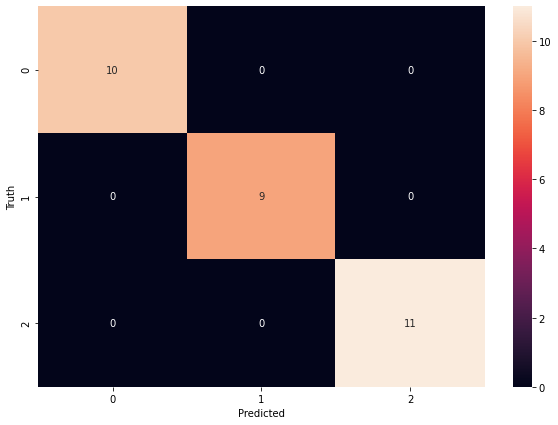

In [34]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### classification report

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_predicted))